In [4]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
decode_review(train_data[1])

557056/550378 [==============================] - 1s 1us/step


'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [6]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train_labels[:1000]
partial_y_train = y_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 224us/step - loss: 2.5530 - acc: 0.5247 - val_loss: 1.7379 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.4267 - acc: 0.7097 - val_loss: 1.3155 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.0576 - acc: 0.7808 - val_loss: 1.1512 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8310 - acc: 0.8255 - val_loss: 1.0609 - val_acc: 0.7630
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.6620 - acc: 0.8629 - val_loss: 0.9798 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.5285 - acc: 0.8905 - val_loss: 0.9438 - val_acc: 0.7890
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.4267 - a

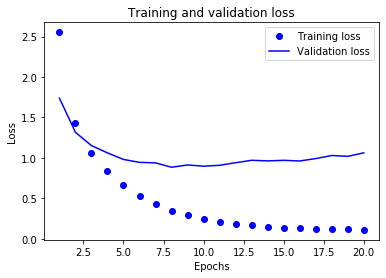

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

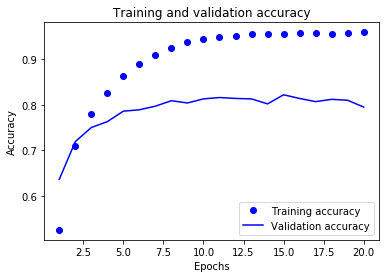

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 211us/step - loss: 2.5590 - acc: 0.5529 - val_loss: 1.6584 - val_acc: 0.6580
Epoch 2/8
7982/7982 [==============================] - 1s 150us/step - loss: 1.3886 - acc: 0.7186 - val_loss: 1.2980 - val_acc: 0.7200
Epoch 3/8
7982/7982 [==============================] - 1s 148us/step - loss: 1.0521 - acc: 0.7779 - val_loss: 1.1447 - val_acc: 0.7440
Epoch 4/8
7982/7982 [==============================] - 1s 150us/step - loss: 0.8404 - acc: 0.8236 - val_loss: 1.0654 - val_acc: 0.7820
Epoch 5/8
7982/7982 [==============================] - 1s 150us/step - loss: 0.6704 - acc: 0.8564 - val_loss: 0.9961 - val_acc: 0.7810
Epoch 6/8
7982/7982 [==============================] - 1s 150us/step - loss: 0.5360 - acc: 0.8855 - val_loss: 0.9310 - val_acc: 0.8050
Epoch 7/8
7982/7982 [==============================] - 1s 151us/step - loss: 0.4324 - acc: 0.9083 - val_loss: 0.9002 - val_acc: 0.8110
Epoch 8

[1.002314229576267, 0.7791629563137982]

In [16]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array) / len(test_labels))

0.188780053428317

In [17]:
predictions = model.predict(x_test)
predictions[0]

array([4.2298716e-06, 5.3270076e-05, 5.9171985e-06, 9.9108475e-01,
       5.5085993e-03, 2.1984379e-06, 2.8345132e-05, 7.6219130e-06,
       1.4477492e-04, 2.5804746e-05, 1.1683193e-05, 5.3950876e-04,
       1.1609888e-05, 1.4893843e-04, 1.1356530e-05, 4.5408967e-07,
       4.2812794e-04, 6.1962673e-05, 3.9305494e-05, 6.5572670e-04,
       6.4967200e-04, 2.6020756e-05, 1.4239139e-06, 9.9887679e-05,
       9.4907991e-06, 3.7417467e-05, 4.9265145e-06, 5.4167890e-06,
       2.3848175e-05, 2.3686971e-05, 1.9860925e-06, 4.1274619e-05,
       3.6561290e-05, 2.8137183e-05, 2.1553949e-05, 8.6207899e-07,
       7.1898387e-05, 1.0682431e-05, 1.2390904e-05, 3.0354429e-05,
       6.8387317e-06, 6.3422696e-05, 4.1152598e-06, 1.7268312e-06,
       5.5849273e-06, 6.7080446e-06], dtype=float32)